In [1]:
## last edited: 5/27/22
## Status: Fixed path names to match new directory structure. 
##         Similar to previous notebooks but with better automation of IR eye plotting

from datetime import datetime
import os

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import metpy  # noqa: F401
import numpy as np
import xarray as xr
import shapely.geometry as sgeom
import matplotlib.patches as mpatches
import warnings

os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots

In [2]:
path = "/Users/etmu9498/research/data/goes-satellite/tc-eyes"
os.chdir(path)

# for 9/26, 22:38 Mesoscale 1... looking at TC sam eye pass 1 
C = xr.open_dataset( "OR_ABI-L2-MCMIPM1-M6_G16_s20212692238252_e20212692238314_c20212692238398.nc")
ind1 = 220
ind2 = 1510
extent = [-57, -47, 11, 21] # zoomed out
lon1= -52 
lon2= -49
extent = [lon1, lon2, 14.1, 14.7] # zoomed in
tdr_inbound_ind = 0
tdr_outbound_ind = 1
crl_ind = 16
fig_size = (15, 12)

# for 9/26, 23:52 Mesoscale 1... looking at TC sam eye pass 2
# C = xr.open_dataset( "OR_ABI-L2-MCMIPM1-M6_G16_s20212692352252_e20212692352315_c20212692352395.nc")
# ind1 = 2350
# ind2 = 3800
# lon1 = -51.5
# lon2 = -50
# extent = [lon1, lon2, 13, 16] # zoomed in
# tdr_inbound_ind = 2
# tdr_outbound_ind = 3
# crl_ind = 16
# fig_size = (18, 27)


# for 9/26, 24:56 Mesoscale 1... looking at TC sam eye pass 3
# C = xr.open_dataset( "OR_ABI-L2-MCMIPM1-M6_G16_s20212700056252_e20212700056314_c20212700056387.nc")
# ind1 = 4400
# ind2 = 5600
# lon1 = -51.75
# lon2 = -49.9
# extent = [ lon1, lon2, 13, 15.75] # zoomed in
# tdr_inbound_ind = 4
# tdr_outbound_ind = 5
# crl_ind = 16
# fig_size = (16, 21.2)



# for 9/27, 23:22 Mesoscale 1... looking at TC sam eye pass 2
# C = xr.open_dataset( "OR_ABI-L2-MCMIPM1-M6_G16_s20212702322252_e20212702322320_c20212702322397.nc")
# ind1 = 2600
# ind2 = 3900
# lon1 = -53.5
# lon2 = -52
# extent = [ lon1, lon2, 15, 18] # zoomed in
# tdr_inbound_ind = 8
# tdr_outbound_ind = 9
# crl_ind = 17
# fig_size = (15, 28)


# for 9/27, 24:32 Mesoscale 1... looking at TC sam eye pass 3
# C = xr.open_dataset( "OR_ABI-L2-MCMIPM1-M6_G16_s20212710032252_e20212710032309_c20212710032399.nc")
# ind1 = 4700
# ind2 = 6000
# lon1 = -54
# lon2 = -51.75
# extent = [ lon1, lon2, 15, 17.75] # zoomed in
# tdr_inbound_ind = 10
# tdr_outbound_ind = 11
# crl_ind = 17
# fig_size = (15, 28)

# for 9/29, 21:38 Mesoscale 1, eye pass 1
# C = xr.open_dataset( "OR_ABI-L2-MCMIPM2-M6_G16_s20212722138553_e20212722139010_c20212722139102.nc")
# ind1 = 0
# ind2 = 1600
# lon1 = -54
# lon2 = -51.75
# extent = [ lon1, lon2, 15, 17.75] # zoomed in
# tdr_inbound_ind = 10
# tdr_outbound_ind = 11
# crl_ind = 18
# fig_size = (15, 28)

# for 9/29, 22:51 Mesoscale 1... looking at TC sam eye pass 2
# C = xr.open_dataset( "OR_ABI-L2-MCMIPM2-M6_G16_s20212722251553_e20212722252016_c20212722252089.nc")
# ind1 = 2100
# ind2 = 3800
# lon1 = -54
# lon2 = -51.75
# extent = [ lon1, lon2, 15, 17.75] # zoomed in
# tdr_inbound_ind = 10
# tdr_outbound_ind = 11
# crl_ind = 18
# fig_size = (15, 28)

In [3]:
# look at the IR bands: one with corrections, the other original

# Scan's start time, converted to datetime object
scan_start = datetime.strptime(C.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

# Scan's end time, converted to datetime object
scan_end = datetime.strptime(C.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(C.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
midpoint = str(C['t'].data)[:-8]
scan_mid = datetime.strptime(midpoint, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : {}'.format(scan_start))
print('Scan midpoint : {}'.format(scan_mid))
print('Scan End      : {}'.format(scan_end))
print('File Created  : {}'.format(file_created))
print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))

# applying a normalization filter to channel 13 to correct IR stuff!
cleanIR = C['CMI_C13'].data

# Normalize the channel between a range.
#       cleanIR = (cleanIR-minimumValue)/(maximumValue-minimumValue)
cleanIR = (cleanIR-90)/(313-90)

# Apply range limits to make sure values are between 0 and 1
cleanIR = np.clip(cleanIR, 0, 1)

# Invert colors so that cold clouds are white
cleanIR = 1 - cleanIR

# Lessen the brightness of the coldest clouds so they don't appear so bright
# when we overlay it on the true color image.
cleanIR = cleanIR/1.4

RGB_cleanIR = np.dstack([cleanIR, cleanIR, cleanIR])

Scan Start    : 2021-09-26 22:38:25.200000
Scan midpoint : 2021-09-26 22:38:28.300000
Scan End      : 2021-09-26 22:38:31.400000
File Created  : 2021-09-26 22:38:39.800000
Scan Duration : 0.10 minutes


In [5]:
# load crl data

crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
crl_list = make_plots.load_crl( crl_path)
tdr_path = "/Users/etmu9498/research/data/tdr/sam/nc-files"
tdr_list = make_plots.load_tdr(tdr_path)

os.chdir( tdr_path)
inbound_data = tdr_list[ tdr_inbound_ind]
outbound_data = tdr_list[ tdr_outbound_ind]

os.chdir( crl_path)
crl_data = xr.open_dataset( crl_list[ crl_ind])
lat = crl_data.Lat[ind1:ind2]
lon = crl_data.Lon[ind1:ind2] 

dat = C.metpy.parse_cf('CMI_C02')
geos = dat.metpy.cartopy_crs


crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3_20210821H2_213903-225658.cdf
11) P3_20210821H2_213903-262058.cdf
12) P3_20210827H1_203112-275220.cdf
13) P3_20210828H1_200115-221321.cdf
14) P3_20210829H1_171201-223719.cdf
15) P3_20210925H1_211201-243558.cdf
16) P3_20210926H1_220900-255058.cdf
17) P3_20210927H1_213003-253558.cdf
18) P3_20210929H2_211201-261159.cdf
tdr data files:
0) 210926H1_2237_vert_inbound.nc
1) 210926H1_2237_vert_outbound.nc
2) 210926H1_2350_vert_inbound.nc
3) 210926H1_2350_vert_outbound.nc
4) 210926H1_2457_vert_inbound.nc
5) 210926H1_2457_vert_outbound.nc
6) 210927H1_2205_vert_inbound.nc
7) 210927H1_2205_vert_outbound.nc
8) 210927H1_2320_vert_inb

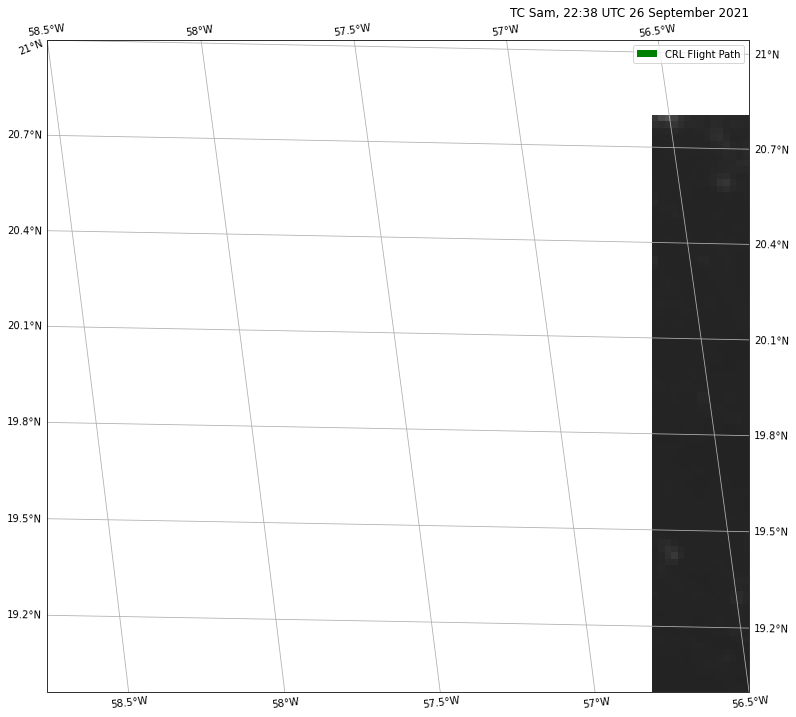

In [6]:
# Zoomed in IR plots corresponding to our data

fig = plt.figure(figsize=(15, 12))

# these steps use goes ch 2 as a proxy to load things like lat and lon positions
dat = C.metpy.parse_cf('CMI_C02')
x = dat.x
y = dat.y
geos = dat.metpy.cartopy_crs

ax = fig.add_subplot(1, 1, 1, projection=geos)

# plot crl path
track = sgeom.LineString(zip(lon, lat))
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none', edgecolor='g', linewidth=2)                          

ax.imshow( RGB_cleanIR * 2.5, origin='upper',
          extent=(x.min(), x.max(), y.min(), y.max()),
          transform=geos )

sam = mpatches.Rectangle((0, 0), 1, 1, facecolor="g") 
ax.legend([sam], ['CRL Flight Path'])

# plt.title('GOES-16 Clean IR Channel', fontweight='bold', fontsize=15, loc='left')
plt.title('TC Sam, {}'.format(scan_start.strftime('%H:%M UTC %d %B %Y')),
          loc='right')

# ax.tick_params(axis='both',labelsize=200,direction='out',right=False,top=False)
ax.gridlines(draw_labels=True) # , linewidth=0)

# zoom in 9/26
ax.set_extent( [-58.5, -56.5, 19, 21] )
# zoom out: use code snippet below or just get rid of set_extent for auto fill
# ax.set_extent( extent, crs=ccrs.PlateCarree())

plt.show()

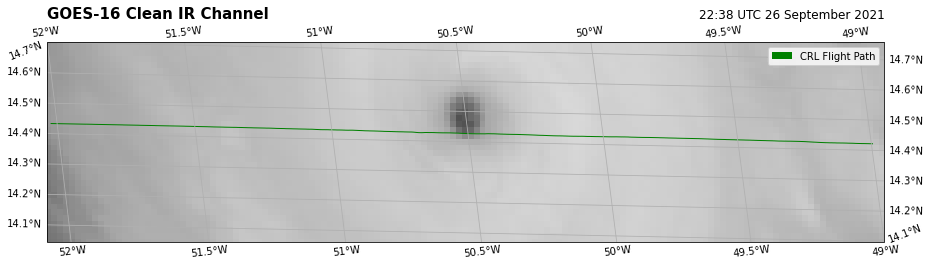

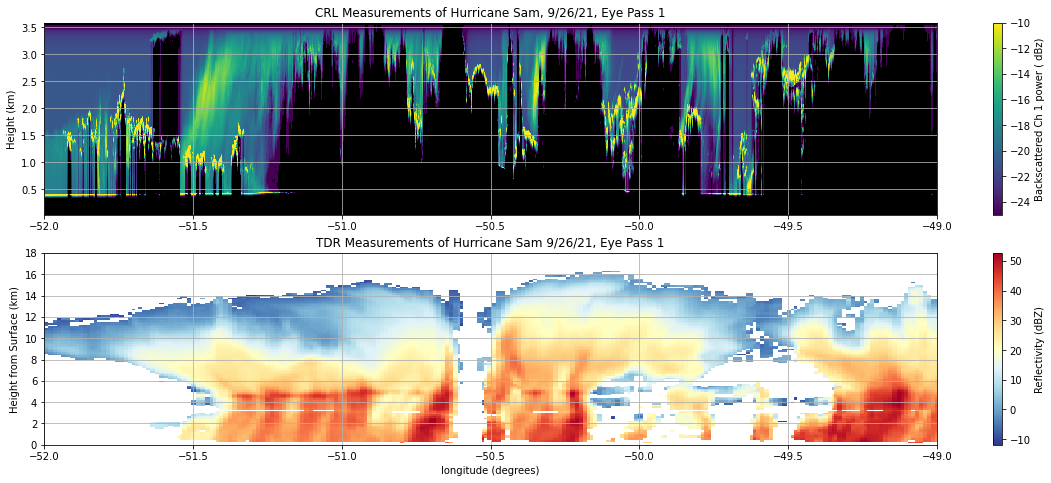

In [7]:
# sam 9/26 eye 1: 220 to 1510: this plot looks really good! I'm happy with the lat lon placements, 
# the lat line seems to go along 14.43 degrees north which is perfect

# things to fix: is there a way to change the projection so that the lat lon lines aren't slanted?!
# how to change projections? Issues with using geos and platecarree in one plot?

# change to a dashed line?


warnings.filterwarnings("ignore")

fig = plt.figure(figsize= fig_size) # (15, 12) eye 1, (18, 27) eye 2, 
# these steps use goes ch 2 as a proxy to load things like lat and lon positions
dat = C.metpy.parse_cf('CMI_C02')
x = dat.x
y = dat.y
geos = dat.metpy.cartopy_crs

ax = fig.add_subplot(1, 1, 1, projection=geos)

# plot crl path
track = sgeom.LineString(zip(lon, lat))
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none', edgecolor='g')                          

ax.imshow( RGB_cleanIR * 2.3, origin='upper',
          extent=(x.min(), x.max(), y.min(), y.max()),
          transform=geos )

sam26 = mpatches.Rectangle((0, 0), 1, 1, facecolor="g") 
ax.legend([sam26], ['CRL Flight Path'])

plt.title('GOES-16 Clean IR Channel', fontweight='bold', fontsize=15, loc='left')
plt.title('{}'.format(scan_start.strftime('%H:%M UTC %d %B %Y')),
          loc='right')

ax.gridlines(draw_labels=True)

# sam 9/26 eye 1
ax.set_extent( extent, crs=ccrs.PlateCarree())

plt.show()

fig2 = plt.figure(figsize=(20, 12))

plt.subplot(312)
plt.title ("CRL Measurements of Hurricane Sam, 9/26/21, Eye Pass 1")
make_plots.plot_power_ch1( crl_path, crl_list[ crl_ind], ind1, ind2, 'lon')
plt.xlim([lon1, lon2])

plt.subplot(313)
plt.title( "TDR Measurements of Hurricane Sam 9/26/21, Eye Pass 1")
make_plots.plot_tdr( tdr_path, inbound_data, outbound_data, 'lon')
plt.xlim([lon1, lon2])

# plt.axvline(x=-50.45, ymin=0, ymax=2.2, linewidth=3, clip_on=False)
# plt.axvline(x=-50.65, ymin=0, ymax=2.2, linewidth=3, clip_on=False)


warnings.filterwarnings("default")
